In [64]:
# Temperature Forecast Project using ML
# Samrat Dey
# Batch - DS2312

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [66]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv')
pd.set_option('display.max_columns', None)
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


The dataset cosists of summer data from 2013 to 2017 which contains numerical data. Here 'Next_Tmax' and 'Next_Tmin' are the target variables which contains continuous data, so it will be temed as 'Regression Problem' where we need to predict the Next day Maximum and Minimum temperature.

In [67]:
df.shape

(7752, 25)

The dataset contains 2252 rows and 25 columns, out of which 1 column is taraget variable and the remaining 24 columns are independent variables

In [68]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [69]:
df.columns.tolist()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [70]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

There are two different types of data (float64 and object) present in the dataset

In [71]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [73]:
# Replacing null values in continuous column using mean and in categorical column using mode
for i in df.columns:
    if df[i].dtypes=="object":
        mode = df[i].mode()
        df[i]=df[i].fillna(mode[0])
    else:
        df[i]=df[i].fillna(df[i].mean())
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,13.0,01-07-2013,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [74]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Date              7752 non-null   object 
 2   Present_Tmax      7752 non-null   float64
 3   Present_Tmin      7752 non-null   float64
 4   LDAPS_RHmin       7752 non-null   float64
 5   LDAPS_RHmax       7752 non-null   float64
 6   LDAPS_Tmax_lapse  7752 non-null   float64
 7   LDAPS_Tmin_lapse  7752 non-null   float64
 8   LDAPS_WS          7752 non-null   float64
 9   LDAPS_LH          7752 non-null   float64
 10  LDAPS_CC1         7752 non-null   float64
 11  LDAPS_CC2         7752 non-null   float64
 12  LDAPS_CC3         7752 non-null   float64
 13  LDAPS_CC4         7752 non-null   float64
 14  LDAPS_PPT1        7752 non-null   float64
 15  LDAPS_PPT2        7752 non-null   float64
 16  LDAPS_PPT3        7752 non-null   float64


<Axes: >

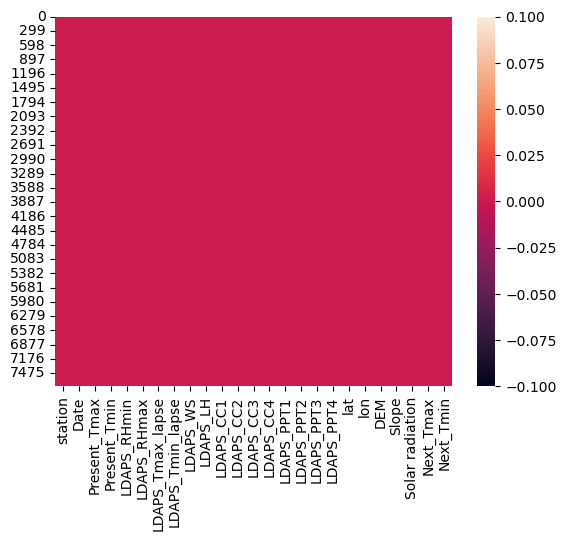

In [76]:
sns.heatmap(df.isnull())

In [77]:
# Checking nmber of unique values in each column
df.nunique().to_frame("No. of Unique values")

,No. of Unique values
station,25
Date,310
Present_Tmax,168
Present_Tmin,156
LDAPS_RHmin,7673
LDAPS_RHmax,7665
LDAPS_Tmax_lapse,7676
LDAPS_Tmin_lapse,7676
LDAPS_WS,7676
LDAPS_LH,7676


In [78]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,290.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,290.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,290.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,290.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,290.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,304.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,304.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,304.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,13.0,0.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [79]:
# Statistical summary of numerical columns
df.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,154.460139,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,89.517454,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,0.256810,0.249148,0.253114,1.936331,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,0.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,77.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,0.142328,0.103100,0.082741,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,154.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,0.315667,0.265264,0.232354,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,232.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,0.494007,0.497230,0.067593,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,309.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


1. The counts of all the columns are same which means there are no missing values in the dataset
2. By summerizing the data we can observe that there are difference between 75% and max in all the columns, hence there are outliers present in the data

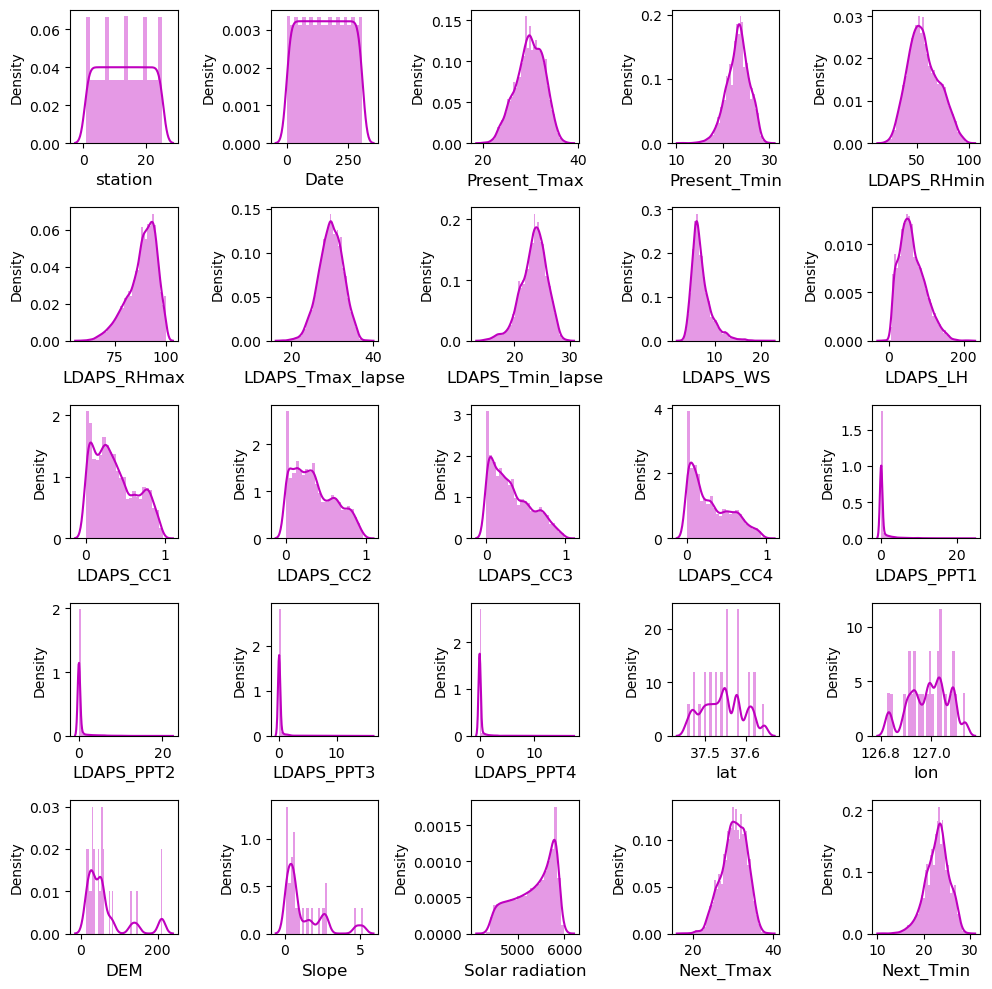

In [80]:
plt.figure(figsize=(10,10),facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

# Predict the minimum temperature for the next day

In [81]:
y_min=df['Next_Tmin']
x_min=df.drop(columns=['Next_Tmin'])

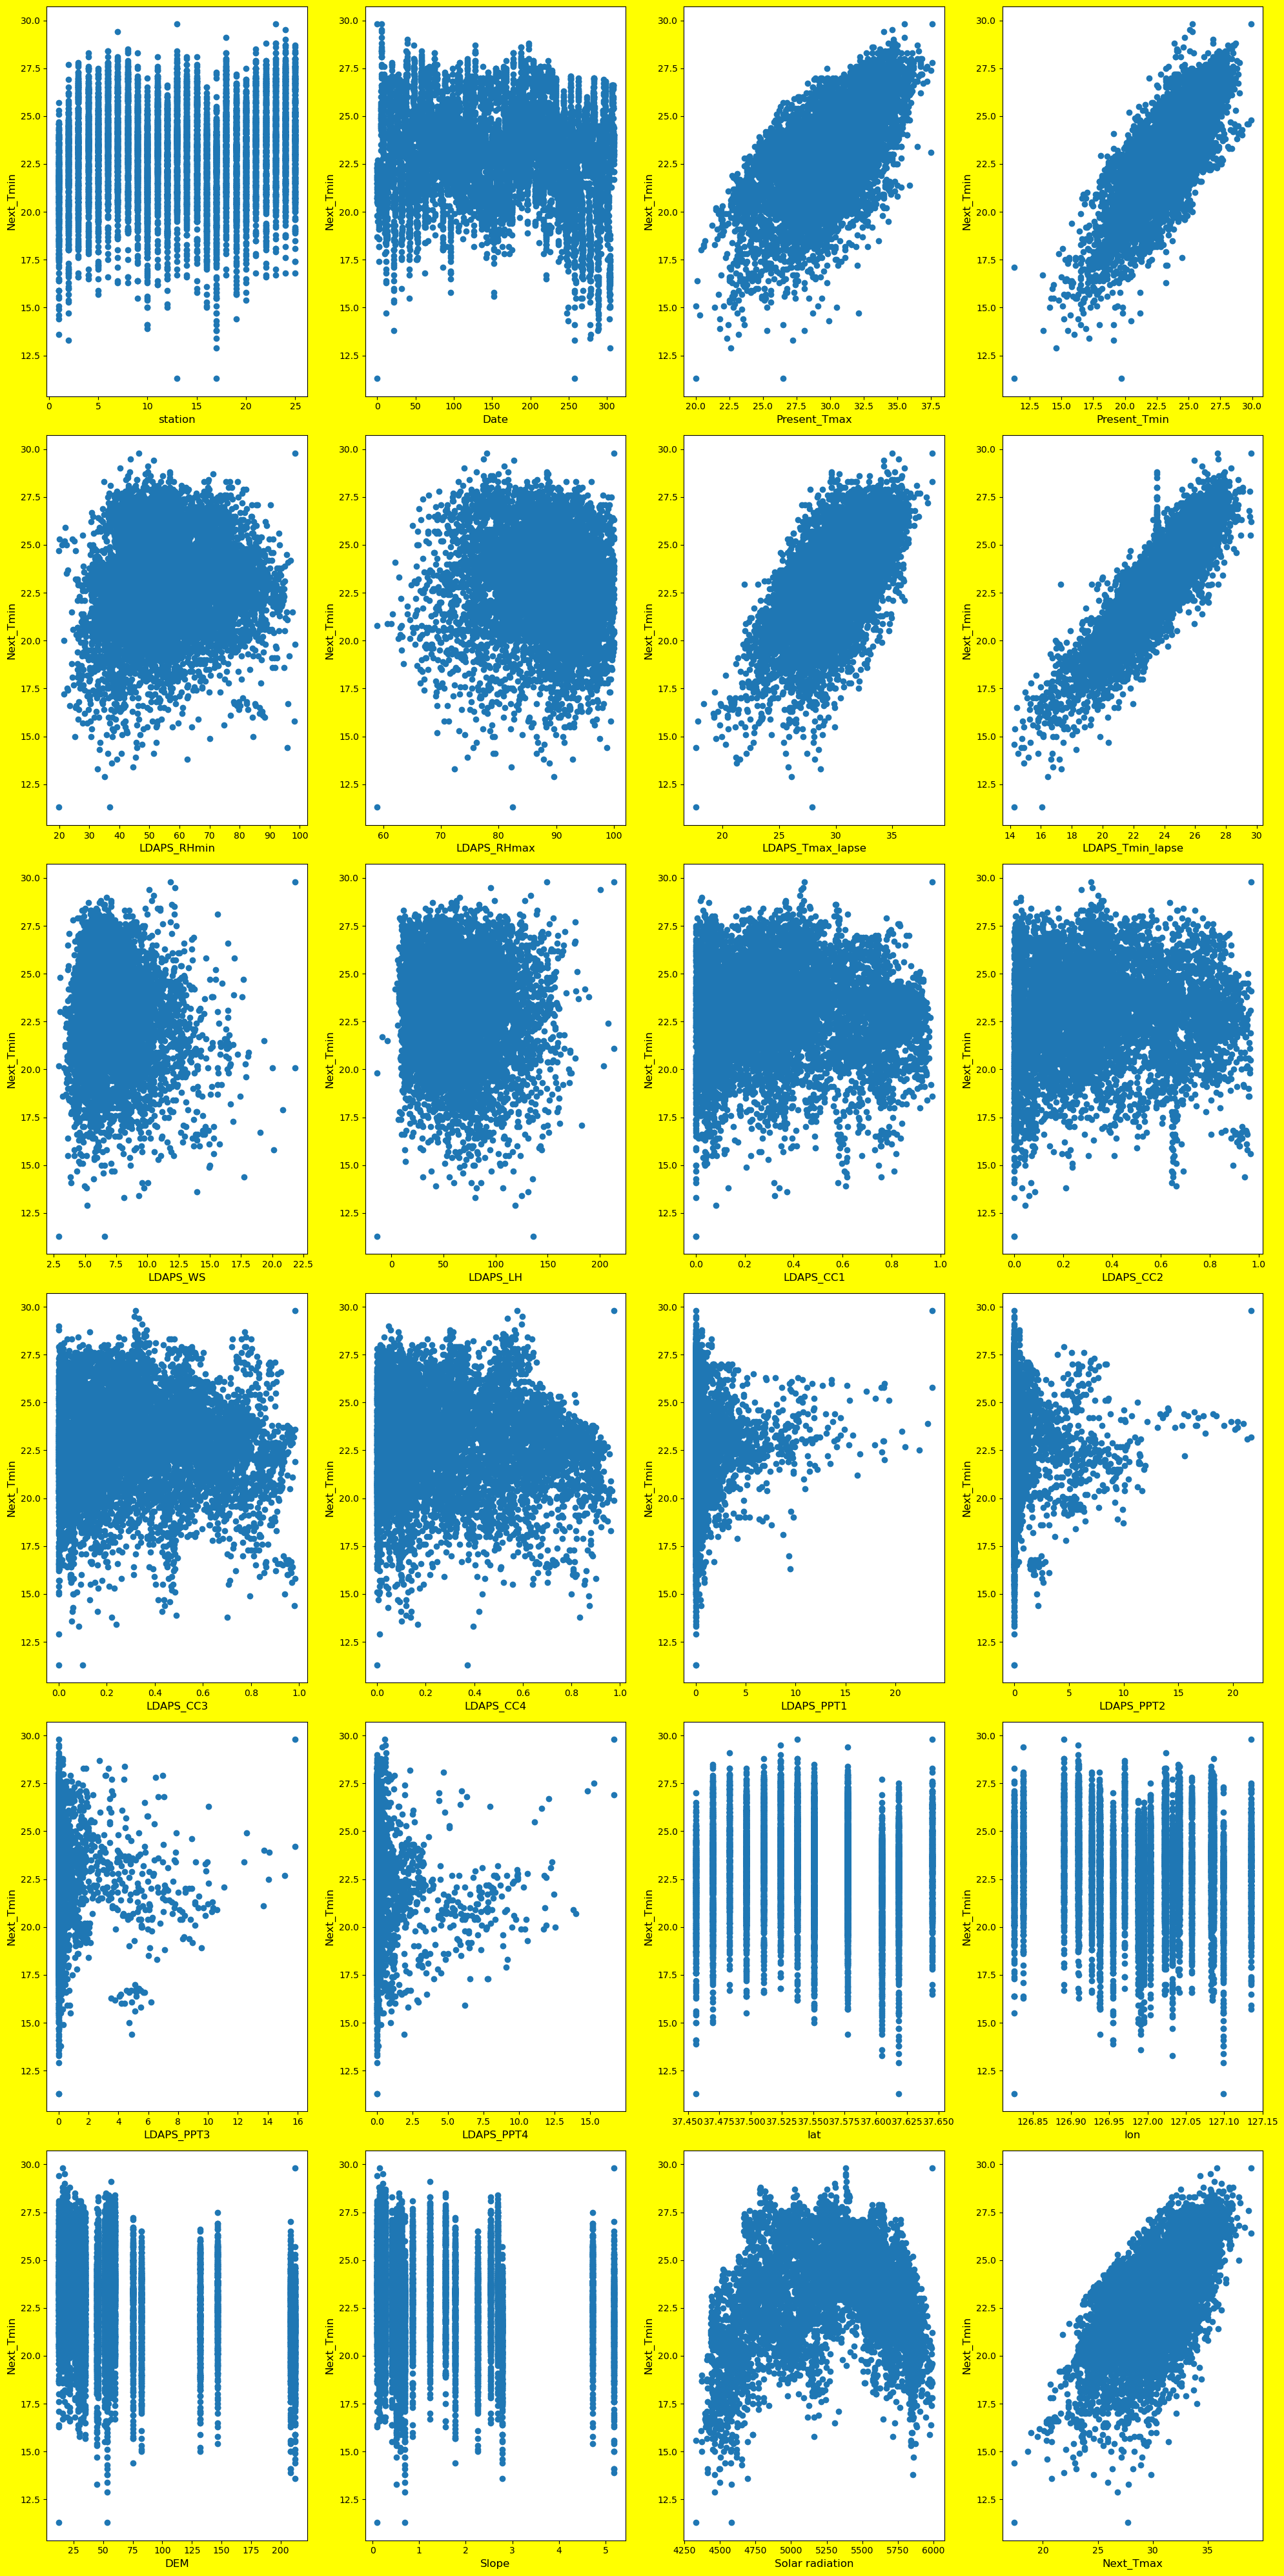

In [82]:
plt.figure(figsize=(20,40),facecolor="Yellow")
plotnumber=1
for col in x_min:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        plt.scatter(x_min[col],y)
        plt.xlabel(col,fontsize=12)
        plt.ylabel('Next_Tmin', fontsize=12)
    plotnumber+=1
plt.tight_layout()

As all the features shows a positive trend, it means all the features are important in building the model. The relationship between dependent and independent variables look fairly linear. Thus, our linearly assumption satisfied.

In [84]:
# Data Scaling
scaler=StandardScaler()
x_min_scaled=scaler.fit_transform(x_min)
x_min_scaled

array([[-1.6643153 ,  1.51421425, -0.36132577, ...,  1.11500407,
         1.51793488, -0.37628214],
       [-1.52562236,  1.51421425,  0.72108401, ..., -0.54215762,
         1.22994952,  0.07209725],
       [-1.38692941,  1.51421425,  0.61960809, ..., -0.7231326 ,
         1.21653443,  0.26425985],
       ...,
       [ 1.6643153 ,  1.67061842, -2.22171758, ..., -0.71933797,
        -2.0743251 , -0.79263444],
       [ 0.        , -1.72558643, -3.30412736, ..., -0.8454552 ,
        -2.35821196, -4.12345278],
       [ 0.        , -1.72558643,  2.64912642, ...,  2.86143459,
         1.51793488,  2.76237361]])

In [85]:
x_min_train,x_min_test,y_min_train,y_min_test=train_test_split(x_min_scaled,y_min,test_size=0.25,random_state=300)
y_min_train.head()

3390    22.9
3467    22.6
5360    22.8
870     25.8
1155    27.0
Name: Next_Tmin, dtype: float64

In [86]:
regression=LinearRegression()
regression.fit(x_min_train,y_min_train)

LinearRegression()

In [87]:
# Before testing the model we'll try to predict on one sample
df.tail(2)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7750,13.0,0.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.370,0.098475,4329.520508,17.4,11.3
7751,13.0,0.0,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.97471,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.335,5.178230,5992.895996,38.9,29.8


In [88]:
print('Minimum temperature for the next day is:',regression.predict(scaler.transform([[13.0,0.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.370,0.098475,4329.520508,17.4]])))

Minimum temperature for the next day is: [11.26891]


Predicted minimum temperature for the next day is 11.26891, and the actual minimum temperature for the next day is 11.3

In [89]:
# Save the model before using it for prediction
pickle.dump(regression,open('Tmin_model','wb'))

In [90]:
# Prediction using the saved model
loaded_model=pickle.load(open('Tmin_model','rb'))
a=loaded_model.predict(scaler.transform([[13.0,0.0,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.97471,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.335,5.178230,5992.895996,38.9]]))
a

array([28.95398548])

In [91]:
# Predict the model on test data
x_min_test[1]
y_min_pred=regression.predict(x_min_test)
y_min_pred

array([26.81947291, 16.38933225, 26.20892677, ..., 22.56090941,
       24.31442204, 25.31482739])

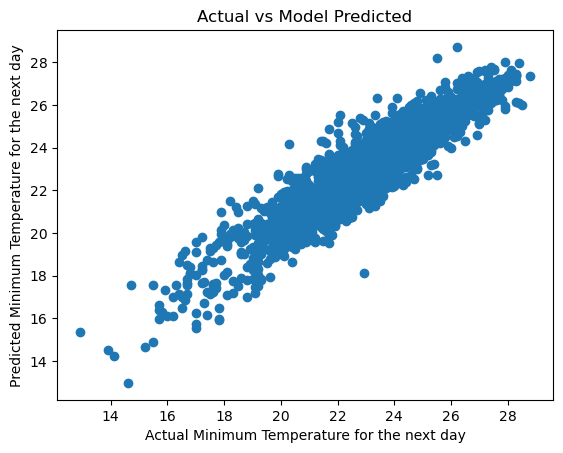

In [92]:
# Compare predicted label and actual label using visualization
plt.scatter(y_min_test,y_min_pred)
plt.xlabel('Actual Minimum Temperature for the next day')
plt.ylabel('Predicted Minimum Temperature for the next day')
plt.title('Actual vs Model Predicted')
plt.show()

# Predict the maximum temperature for the next day

In [93]:
y_max=df['Next_Tmax']
x_max=df.drop(columns=['Next_Tmax'])

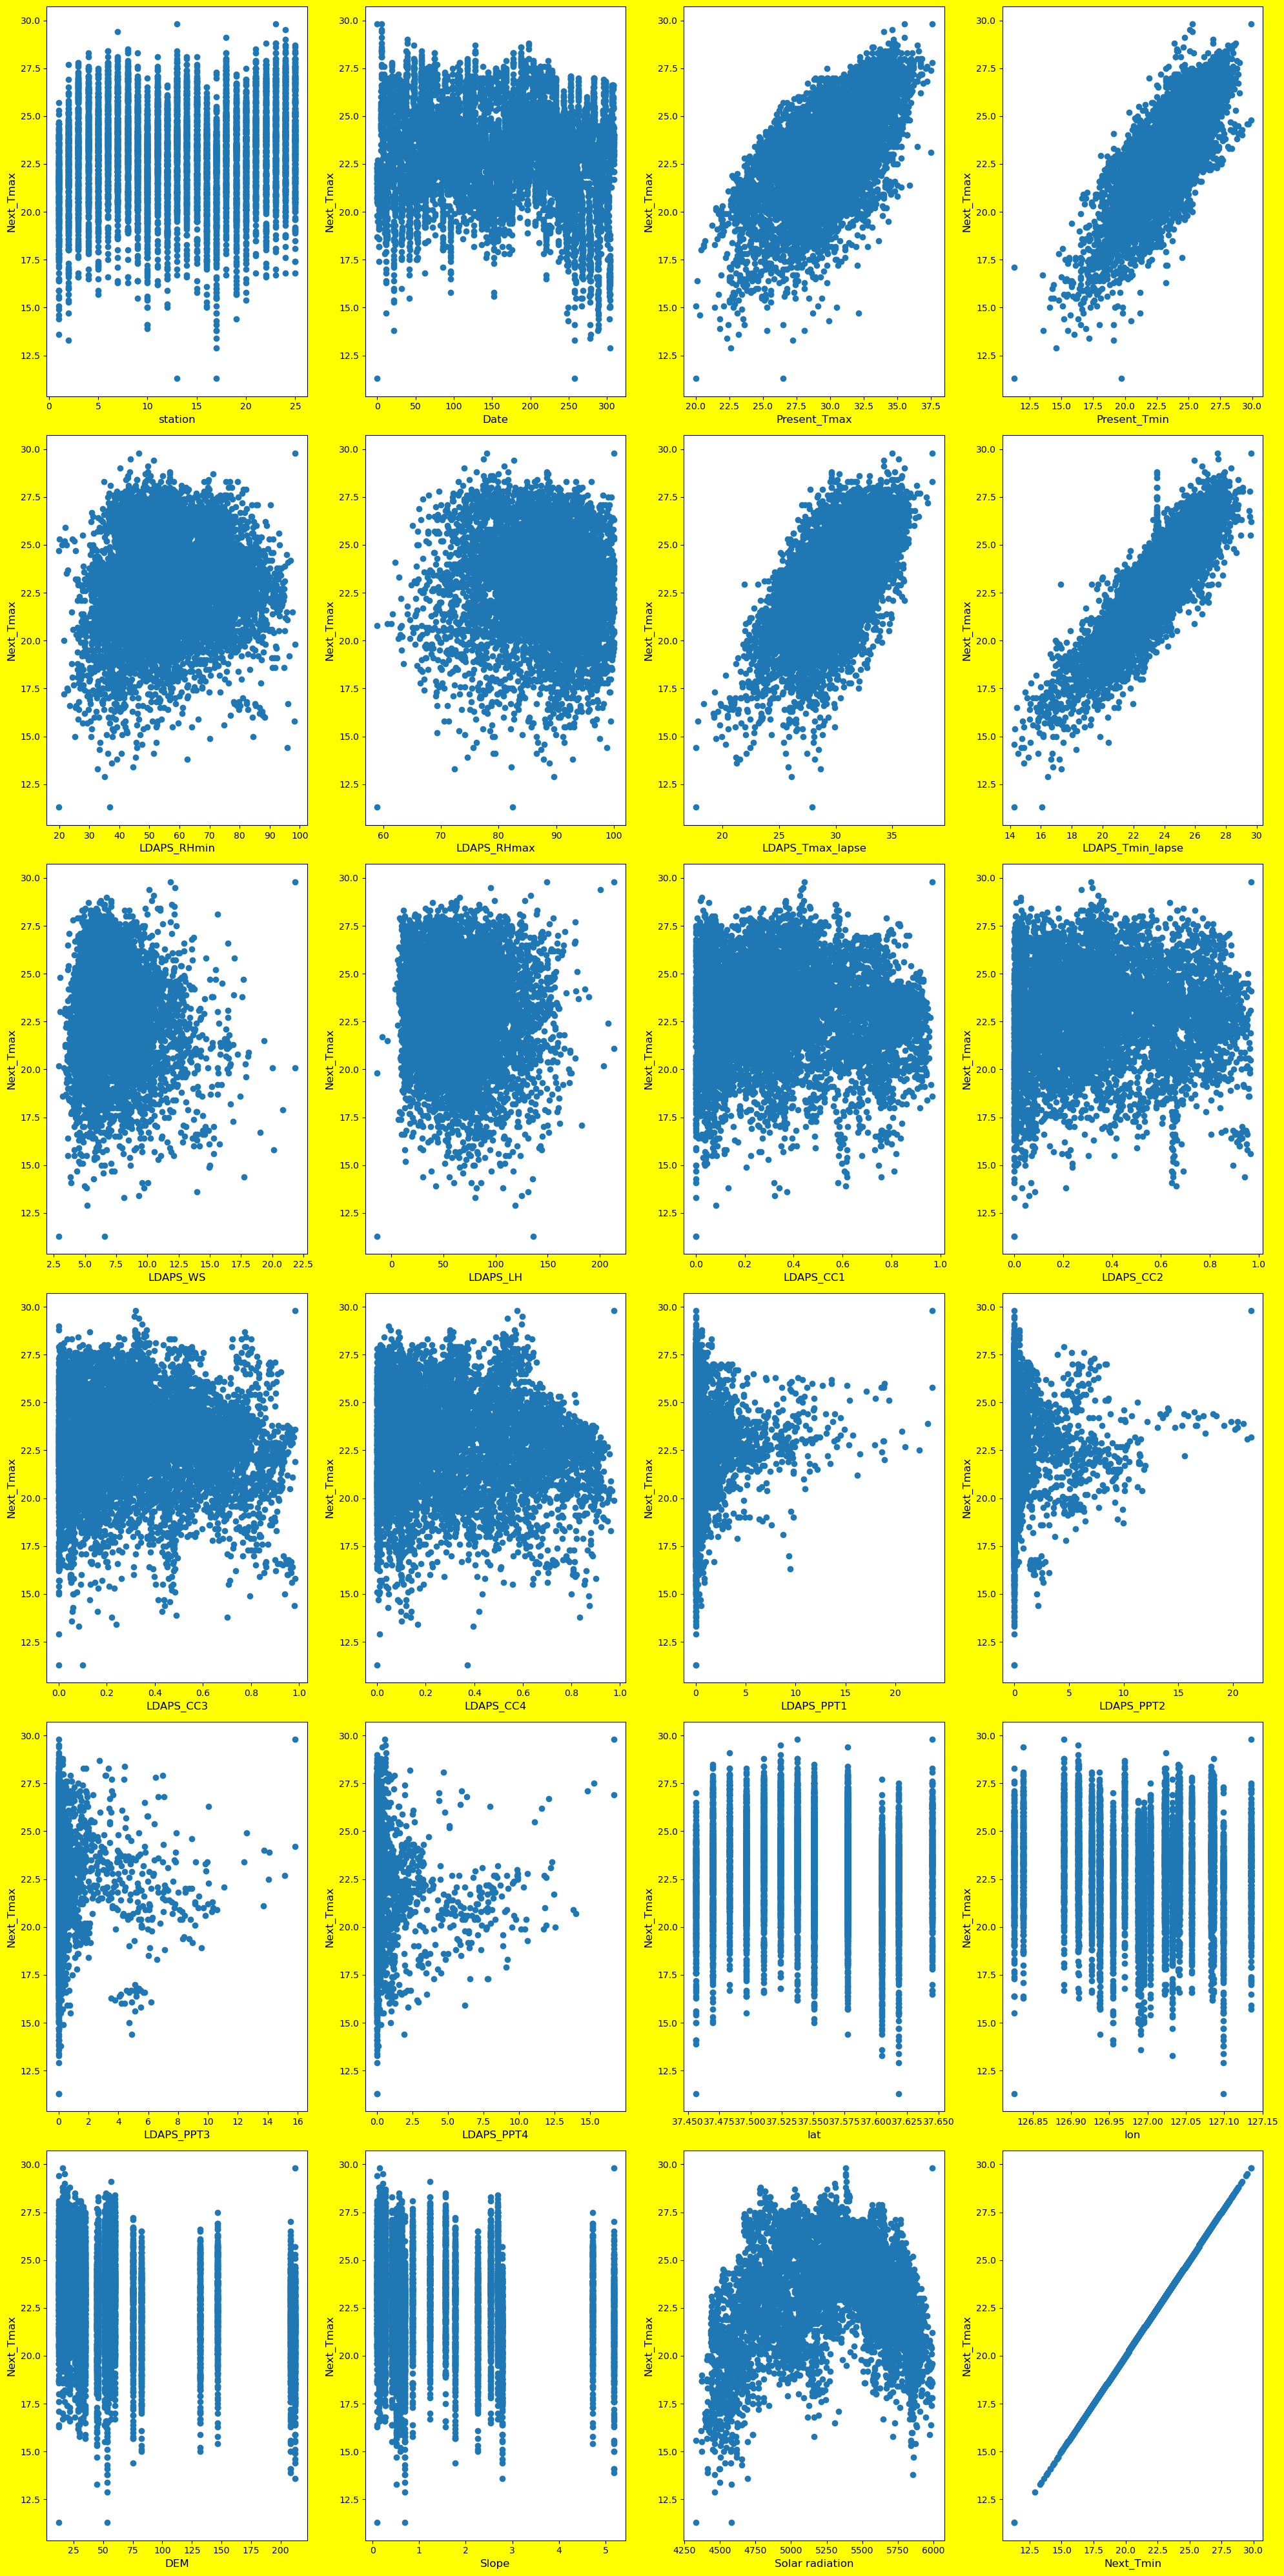

In [94]:
plt.figure(figsize=(20,40),facecolor="Yellow")
plotnumber=1
for col in x_max:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        plt.scatter(x_max[col],y)
        plt.xlabel(col,fontsize=12)
        plt.ylabel('Next_Tmax', fontsize=12)
    plotnumber+=1
plt.tight_layout()

As all the features shows a positive trend, it means all the features are important in building the model. The relationship between dependent and independent variables look fairly linear. Thus, our linearly assumption satisfied.

In [95]:
# Data Scaling
scaler=StandardScaler()
x_max_scaled=scaler.fit_transform(x_max)
x_max_scaled

array([[-1.6643153 ,  1.51421425, -0.36132577, ...,  1.11500407,
         1.51793488, -0.6975993 ],
       [-1.52562236,  1.51421425,  0.72108401, ..., -0.54215762,
         1.22994952, -0.17406357],
       [-1.38692941,  1.51421425,  0.61960809, ..., -0.7231326 ,
         1.21653443,  0.38974413],
       ...,
       [ 1.6643153 ,  1.67061842, -2.22171758, ..., -0.71933797,
        -2.0743251 , -2.2279345 ],
       [ 0.        , -1.72558643, -3.30412736, ..., -0.8454552 ,
        -2.35821196, -4.68452522],
       [ 0.        , -1.72558643,  2.64912642, ...,  2.86143459,
         1.51793488,  2.76579089]])

In [96]:
x_max_train,x_max_test,y_max_train,y_max_test=train_test_split(x_max_scaled,y_max,test_size=0.25,random_state=300)
y_max_train.head()

3390    26.5
3467    35.8
5360    28.2
870     31.7
1155    32.9
Name: Next_Tmax, dtype: float64

In [97]:
regression=LinearRegression()
regression.fit(x_max_train,y_max_train)

LinearRegression()

In [98]:
# Before testing the model we'll try to predict on one sample
df.tail(2)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7750,13.0,0.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.370,0.098475,4329.520508,17.4,11.3
7751,13.0,0.0,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.97471,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.335,5.178230,5992.895996,38.9,29.8


In [99]:
print('Maximum temperature for the next day is:',regression.predict(scaler.transform([[13.0,0.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.370,0.098475,4329.520508,11.3]])))

Maximum temperature for the next day is: [20.2479561]


Predicted maximum temperature for the next day is 20.2479561 and the actual maximum temperature for the next day is 17.4

In [102]:
# Save the model before using it for prediction
pickle.dump(regression,open('Tmax_model','wb'))

In [103]:
# Prediction using the saved model
loaded_model=pickle.load(open('Tmax_model','rb'))
a=loaded_model.predict(scaler.transform([[13.0,0.0,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.97471,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.335,5.178230,5992.895996,29.8]]))
a

array([38.40101087])

In [104]:
# Predict the model on test data
x_max_test[1]
y_max_pred=regression.predict(x_max_test)
y_max_pred

array([33.57209751, 21.66440887, 35.16128092, ..., 33.76186294,
       30.83186847, 31.97415617])

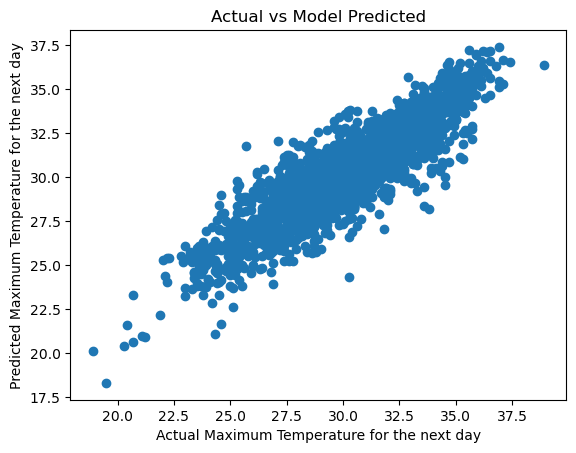

In [105]:
# Compare predicted label and actual label using visualization
plt.scatter(y_max_test,y_max_pred)
plt.xlabel('Actual Maximum Temperature for the next day')
plt.ylabel('Predicted Maximum Temperature for the next day')
plt.title('Actual vs Model Predicted')
plt.show()